In [1]:
import os
print(os.getcwd())

c:\Users\HOME\Desktop\Azure\model


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"../model/azure_usage.csv")


In [3]:
print(df.head())


    timestamp          REGION SERVICE_TYPE  USAGE_UNITS  PROVISIONED_CAPACITY  \
0  2025-02-28    North Europe      Storage         4190                  3969   
1  2025-02-28  Southeast Asia   Networking         2156                   774   
2  2025-02-28   Central India  AI Services         3270                  3461   
3  2025-02-28  Southeast Asia     Database         1782                  1348   
4  2025-02-28  Southeast Asia      Compute         2355                  1915   

   COST_USD  AVAILABILITY_PCT  IS_HOLIDAY  
0    282.96             96.68           0  
1    707.63             95.85           0  
2    658.74             98.23           0  
3    614.92             96.94           0  
4    526.17             96.15           0  


In [4]:
#loading the data
df=pd.read_csv("azure_usage.csv")

In [5]:
print(df.columns)

Index(['timestamp', 'REGION', 'SERVICE_TYPE', 'USAGE_UNITS',
       'PROVISIONED_CAPACITY', 'COST_USD', 'AVAILABILITY_PCT', 'IS_HOLIDAY'],
      dtype='str')


In [6]:
#data preprocessing
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df = df.sort_values(by='timestamp') 
print(df)


     timestamp        REGION SERVICE_TYPE  USAGE_UNITS  PROVISIONED_CAPACITY  \
0   2025-02-28  North Europe      Storage         4190                  3969   
87  2025-02-28       East US     Database         3963                  1831   
86  2025-02-28       East US  AI Services         2833                  2689   
85  2025-02-28       East US     Database         1995                  3930   
84  2025-02-28       East US   Networking          669                  3451   
..         ...           ...          ...          ...                   ...   
33  2025-02-28       East US      Compute         1627                   940   
32  2025-02-28  North Europe      Compute         4087                  1569   
31  2025-02-28  North Europe      Compute         1400                  5377   
118 2025-02-28       East US  AI Services         4246                  3573   
119 2025-02-28       West US  AI Services         3836                  4169   

     COST_USD  AVAILABILITY_PCT  IS_HOL

In [7]:
#maps various region names to a standardized format
df['REGION']=df['REGION'].str.lower().str.replace(" ", "_")

In [8]:
#Maps various region names to a canonical format
df['REGION']=df['REGION'].replace({
    'East Us': 'east_us',
    'Southeast Asia': 'southeast_asia',
})
print(df)

     timestamp        REGION SERVICE_TYPE  USAGE_UNITS  PROVISIONED_CAPACITY  \
0   2025-02-28  north_europe      Storage         4190                  3969   
87  2025-02-28       east_us     Database         3963                  1831   
86  2025-02-28       east_us  AI Services         2833                  2689   
85  2025-02-28       east_us     Database         1995                  3930   
84  2025-02-28       east_us   Networking          669                  3451   
..         ...           ...          ...          ...                   ...   
33  2025-02-28       east_us      Compute         1627                   940   
32  2025-02-28  north_europe      Compute         4087                  1569   
31  2025-02-28  north_europe      Compute         1400                  5377   
118 2025-02-28       east_us  AI Services         4246                  3573   
119 2025-02-28       west_us  AI Services         3836                  4169   

     COST_USD  AVAILABILITY_PCT  IS_HOL

In [9]:

df=df.drop_duplicates()
print(df)

     timestamp        REGION SERVICE_TYPE  USAGE_UNITS  PROVISIONED_CAPACITY  \
0   2025-02-28  north_europe      Storage         4190                  3969   
87  2025-02-28       east_us     Database         3963                  1831   
86  2025-02-28       east_us  AI Services         2833                  2689   
85  2025-02-28       east_us     Database         1995                  3930   
84  2025-02-28       east_us   Networking          669                  3451   
..         ...           ...          ...          ...                   ...   
33  2025-02-28       east_us      Compute         1627                   940   
32  2025-02-28  north_europe      Compute         4087                  1569   
31  2025-02-28  north_europe      Compute         1400                  5377   
118 2025-02-28       east_us  AI Services         4246                  3573   
119 2025-02-28       west_us  AI Services         3836                  4169   

     COST_USD  AVAILABILITY_PCT  IS_HOL

In [10]:
#usage_cpu has some missing values, we will fill them using interpolation
df['USAGE_UNITS']=df['USAGE_UNITS'].interpolate()

In [11]:
#cost derived from usage metrics
df['COST_USD'] = df['COST_USD'].fillna(
    df['USAGE_UNITS'] * 0.5
)


In [12]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
timestamp               0
REGION                  0
SERVICE_TYPE            0
USAGE_UNITS             0
PROVISIONED_CAPACITY    0
COST_USD                0
AVAILABILITY_PCT        0
IS_HOLIDAY              0
dtype: int64


In [13]:
print("Duplicates in Azure data:")
print(df.duplicated().sum())        

Duplicates in Azure data:
0


REGION
central_india     Axes(0.125,0.11;0.775x0.77)
east_us           Axes(0.125,0.11;0.775x0.77)
north_europe      Axes(0.125,0.11;0.775x0.77)
southeast_asia    Axes(0.125,0.11;0.775x0.77)
west_us           Axes(0.125,0.11;0.775x0.77)
Name: USAGE_UNITS, dtype: object

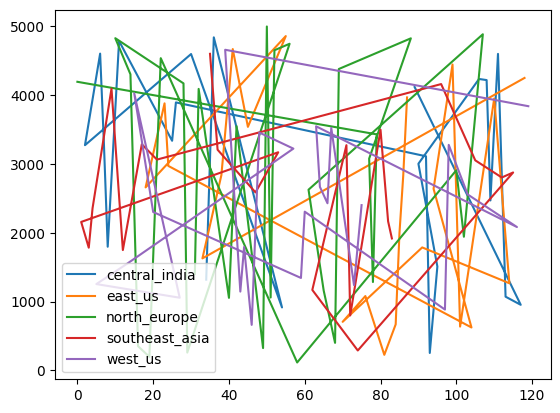

In [14]:
df.groupby('REGION')['USAGE_UNITS'].plot(legend=True)

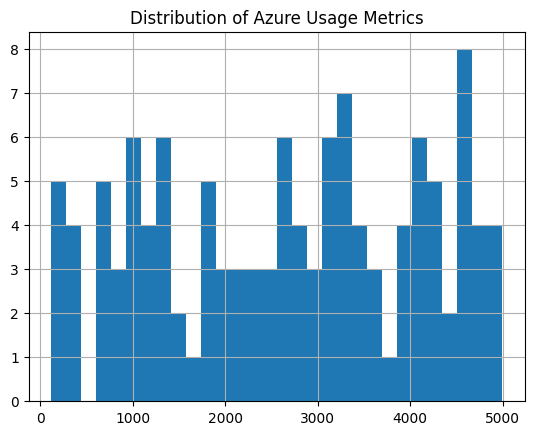

In [15]:
import matplotlib.pyplot as plt
df.hist(column='USAGE_UNITS', bins=30)
plt.title('Distribution of Azure Usage Metrics')
plt.show()

In [16]:
print("--- Milestone 2: Feature Engineering & Data Wrangling ---")

--- Milestone 2: Feature Engineering & Data Wrangling ---


In [17]:
df = df.sort_values("timestamp").reset_index(drop=True)
print(df)

     timestamp          REGION SERVICE_TYPE  USAGE_UNITS  \
0   2025-02-28    north_europe      Storage         4190   
1   2025-02-28         west_us  AI Services         1545   
2   2025-02-28  southeast_asia   Networking         2156   
3   2025-02-28   central_india  AI Services         3270   
4   2025-02-28  southeast_asia     Database         1782   
..         ...             ...          ...          ...   
115 2025-02-28  southeast_asia      Storage         2874   
116 2025-02-28         west_us      Compute         2082   
117 2025-02-28   central_india   Networking          953   
118 2025-02-28         east_us  AI Services         4246   
119 2025-02-28         west_us  AI Services         3836   

     PROVISIONED_CAPACITY  COST_USD  AVAILABILITY_PCT  IS_HOLIDAY  
0                    3969    282.96             96.68           0  
1                    3251    367.83             96.35           0  
2                     774    707.63             95.85           0  
3      

In [18]:
# Create time-based features
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["weekday"] = df["timestamp"].dt.weekday
print(df)


     timestamp          REGION SERVICE_TYPE  USAGE_UNITS  \
0   2025-02-28    north_europe      Storage         4190   
1   2025-02-28         west_us  AI Services         1545   
2   2025-02-28  southeast_asia   Networking         2156   
3   2025-02-28   central_india  AI Services         3270   
4   2025-02-28  southeast_asia     Database         1782   
..         ...             ...          ...          ...   
115 2025-02-28  southeast_asia      Storage         2874   
116 2025-02-28         west_us      Compute         2082   
117 2025-02-28   central_india   Networking          953   
118 2025-02-28         east_us  AI Services         4246   
119 2025-02-28         west_us  AI Services         3836   

     PROVISIONED_CAPACITY  COST_USD  AVAILABILITY_PCT  IS_HOLIDAY  hour  day  \
0                    3969    282.96             96.68           0     0   28   
1                    3251    367.83             96.35           0     0   28   
2                     774    707.63    

In [19]:
# Create lag features for usage metrics
df["lag_1"] = df["USAGE_UNITS"].shift(1)
df["lag_7"] = df["USAGE_UNITS"].shift(7)
print(df)



     timestamp          REGION SERVICE_TYPE  USAGE_UNITS  \
0   2025-02-28    north_europe      Storage         4190   
1   2025-02-28         west_us  AI Services         1545   
2   2025-02-28  southeast_asia   Networking         2156   
3   2025-02-28   central_india  AI Services         3270   
4   2025-02-28  southeast_asia     Database         1782   
..         ...             ...          ...          ...   
115 2025-02-28  southeast_asia      Storage         2874   
116 2025-02-28         west_us      Compute         2082   
117 2025-02-28   central_india   Networking          953   
118 2025-02-28         east_us  AI Services         4246   
119 2025-02-28         west_us  AI Services         3836   

     PROVISIONED_CAPACITY  COST_USD  AVAILABILITY_PCT  IS_HOLIDAY  hour  day  \
0                    3969    282.96             96.68           0     0   28   
1                    3251    367.83             96.35           0     0   28   
2                     774    707.63    

In [20]:
#Rolling mean features
df["rolling_mean_3"] = df["USAGE_UNITS"].rolling(window=3).mean()
print(df)


     timestamp          REGION SERVICE_TYPE  USAGE_UNITS  \
0   2025-02-28    north_europe      Storage         4190   
1   2025-02-28         west_us  AI Services         1545   
2   2025-02-28  southeast_asia   Networking         2156   
3   2025-02-28   central_india  AI Services         3270   
4   2025-02-28  southeast_asia     Database         1782   
..         ...             ...          ...          ...   
115 2025-02-28  southeast_asia      Storage         2874   
116 2025-02-28         west_us      Compute         2082   
117 2025-02-28   central_india   Networking          953   
118 2025-02-28         east_us  AI Services         4246   
119 2025-02-28         west_us  AI Services         3836   

     PROVISIONED_CAPACITY  COST_USD  AVAILABILITY_PCT  IS_HOLIDAY  hour  day  \
0                    3969    282.96             96.68           0     0   28   
1                    3251    367.83             96.35           0     0   28   
2                     774    707.63    

In [21]:
#threshold-based feature
threshold = df["USAGE_UNITS"].quantile(0.95)
df["high_usage"] = (df["USAGE_UNITS"] > threshold).astype(int)
print(df)

     timestamp          REGION SERVICE_TYPE  USAGE_UNITS  \
0   2025-02-28    north_europe      Storage         4190   
1   2025-02-28         west_us  AI Services         1545   
2   2025-02-28  southeast_asia   Networking         2156   
3   2025-02-28   central_india  AI Services         3270   
4   2025-02-28  southeast_asia     Database         1782   
..         ...             ...          ...          ...   
115 2025-02-28  southeast_asia      Storage         2874   
116 2025-02-28         west_us      Compute         2082   
117 2025-02-28   central_india   Networking          953   
118 2025-02-28         east_us  AI Services         4246   
119 2025-02-28         west_us  AI Services         3836   

     PROVISIONED_CAPACITY  COST_USD  AVAILABILITY_PCT  IS_HOLIDAY  hour  day  \
0                    3969    282.96             96.68           0     0   28   
1                    3251    367.83             96.35           0     0   28   
2                     774    707.63    

In [22]:
# encode categorical variables
df = pd.get_dummies(df, columns=["REGION", "SERVICE_TYPE"], drop_first=True)

In [23]:
# --- IGNORE ---
df.info()
df.head()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                120 non-null    datetime64[us]
 1   USAGE_UNITS              120 non-null    int64         
 2   PROVISIONED_CAPACITY     120 non-null    int64         
 3   COST_USD                 120 non-null    float64       
 4   AVAILABILITY_PCT         120 non-null    float64       
 5   IS_HOLIDAY               120 non-null    int64         
 6   hour                     120 non-null    int32         
 7   day                      120 non-null    int32         
 8   weekday                  120 non-null    int32         
 9   lag_1                    119 non-null    float64       
 10  lag_7                    113 non-null    float64       
 11  rolling_mean_3           118 non-null    float64       
 12  high_usage               120 non-null    int64 

timestamp                  0
USAGE_UNITS                0
PROVISIONED_CAPACITY       0
COST_USD                   0
AVAILABILITY_PCT           0
IS_HOLIDAY                 0
hour                       0
day                        0
weekday                    0
lag_1                      1
lag_7                      7
rolling_mean_3             2
high_usage                 0
REGION_east_us             0
REGION_north_europe        0
REGION_southeast_asia      0
REGION_west_us             0
SERVICE_TYPE_Compute       0
SERVICE_TYPE_Database      0
SERVICE_TYPE_Networking    0
SERVICE_TYPE_Storage       0
dtype: int64